Training Accuracy (Gradient Boosting): 0.9152
Test Accuracy (Gradient Boosting): 0.8464
Training Precision (Gradient Boosting): 0.9222
Test Precision (Gradient Boosting): 0.8212
Training Recall (Gradient Boosting): 0.9152
Test Recall (Gradient Boosting): 0.8464
Training F1 Score (Gradient Boosting): 0.9065
Test F1 Score (Gradient Boosting): 0.8467
Training G-Mean (Gradient Boosting): 0.9187
Test G-Mean (Gradient Boosting): 0.8337


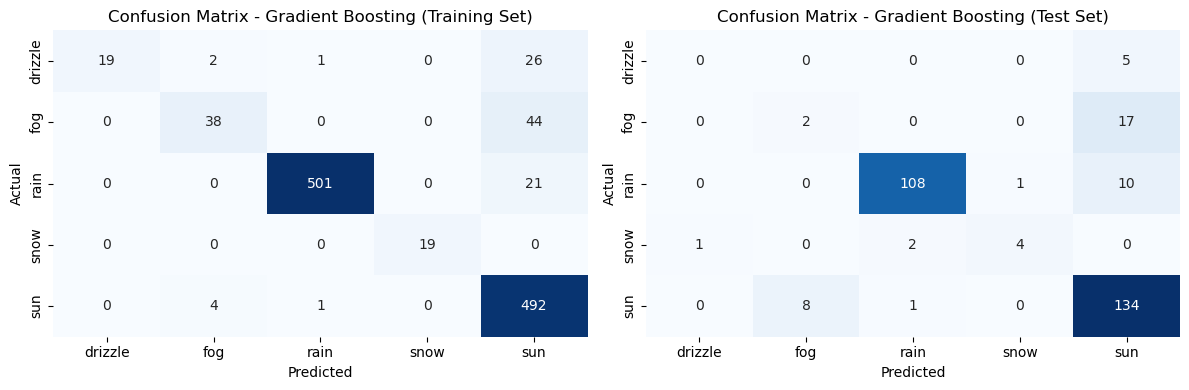

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.utils import shuffle
from scipy.stats import gmean
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('weather.csv')

# Define features (x) and target variable (y)
y = df['weather']
columns_to_drop = ['weather', 'date']
x = df.drop(columns=columns_to_drop, axis=1)

# Shuffle the data (optional but recommended)
x, y = shuffle(x, y, random_state=42)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

# Create Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train the model
gb_classifier.fit(x_train, y_train)

# Make predictions on the training and testing sets
y_gb_train_pred = gb_classifier.predict(x_train)
y_gb_test_pred = gb_classifier.predict(x_test)

# Calculate accuracy
gb_train_accuracy = accuracy_score(y_train, y_gb_train_pred)
gb_test_accuracy = accuracy_score(y_test, y_gb_test_pred)

# Calculate confusion matrix
cm_train_gb = confusion_matrix(y_train, y_gb_train_pred)
cm_test_gb = confusion_matrix(y_test, y_gb_test_pred)

# Calculate precision, recall, F1-score
precision_train_gb = precision_score(y_train, y_gb_train_pred, average='weighted', zero_division=1)
precision_test_gb = precision_score(y_test, y_gb_test_pred, average='weighted', zero_division=1)

recall_train_gb = recall_score(y_train, y_gb_train_pred, average='weighted', zero_division=1)
recall_test_gb = recall_score(y_test, y_gb_test_pred, average='weighted', zero_division=1)

f1_train_gb = f1_score(y_train, y_gb_train_pred, average='weighted', zero_division=1)
f1_test_gb = f1_score(y_test, y_gb_test_pred, average='weighted', zero_division=1)

# Calculate gmean
gmean_train_gb = gmean([recall_train_gb, precision_train_gb])
gmean_test_gb = gmean([recall_test_gb, precision_test_gb])

# Print results
print(f'Training Accuracy (Gradient Boosting): {gb_train_accuracy:.4f}')
print(f'Test Accuracy (Gradient Boosting): {gb_test_accuracy:.4f}')

print(f'Training Precision (Gradient Boosting): {precision_train_gb:.4f}')
print(f'Test Precision (Gradient Boosting): {precision_test_gb:.4f}')

print(f'Training Recall (Gradient Boosting): {recall_train_gb:.4f}')
print(f'Test Recall (Gradient Boosting): {recall_test_gb:.4f}')

print(f'Training F1 Score (Gradient Boosting): {f1_train_gb:.4f}')
print(f'Test F1 Score (Gradient Boosting): {f1_test_gb:.4f}')

print(f'Training G-Mean (Gradient Boosting): {gmean_train_gb:.4f}')
print(f'Test G-Mean (Gradient Boosting): {gmean_test_gb:.4f}')

# Plot confusion matrix for Gradient Boosting - Training Set
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.heatmap(cm_train_gb, annot=True, fmt='g', cmap='Blues', cbar=False,
            xticklabels=gb_classifier.classes_, yticklabels=gb_classifier.classes_)
plt.title('Confusion Matrix - Gradient Boosting (Training Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Plot confusion matrix for Gradient Boosting - Test Set
plt.subplot(1, 2, 2)
sns.heatmap(cm_test_gb, annot=True, fmt='g', cmap='Blues', cbar=False,
            xticklabels=gb_classifier.classes_, yticklabels=gb_classifier.classes_)
plt.title('Confusion Matrix - Gradient Boosting (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()
